<a href="https://colab.research.google.com/github/matsunagalab/lecture_ML/blob/main/machine_learning_13_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第13回 ニューラルネットワークそのe: 代表的なニューラルネット CNN

## MNIST dataset (digits dataset)をConvolutional Neural Network (CNN)で学習

Epoch: 0, Loss: 2.295428991317749
Epoch: 10, Loss: 2.098356008529663
Epoch: 20, Loss: 1.7881120443344116
Epoch: 30, Loss: 1.3279504776000977
Epoch: 40, Loss: 0.8380991816520691
Epoch: 50, Loss: 0.5011556148529053
Epoch: 60, Loss: 0.32201412320137024
Epoch: 70, Loss: 0.22579821944236755
Epoch: 80, Loss: 0.16916602849960327
Epoch: 90, Loss: 0.13249430060386658
Epoch: 100, Loss: 0.10683083534240723
Epoch: 110, Loss: 0.08771676570177078
Epoch: 120, Loss: 0.07288511097431183
Epoch: 130, Loss: 0.061176929622888565
Epoch: 140, Loss: 0.05174688622355461
Epoch: 150, Loss: 0.04408714547753334
Epoch: 160, Loss: 0.0377906896173954
Epoch: 170, Loss: 0.03261176496744156
Epoch: 180, Loss: 0.02832828462123871
Epoch: 190, Loss: 0.02475799061357975
Accuracy: 99.17 %


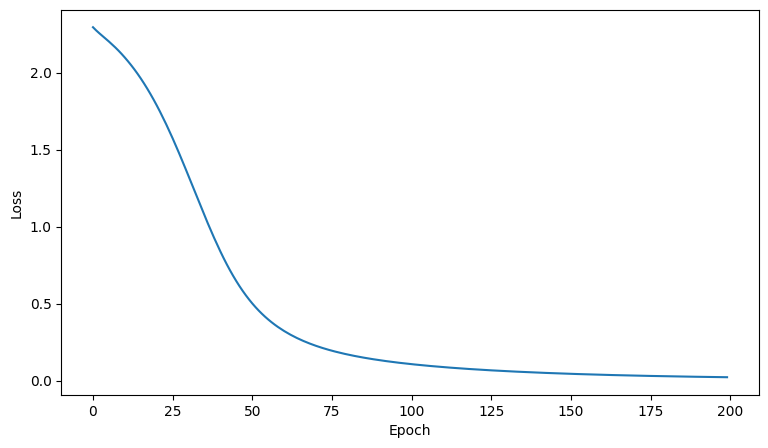

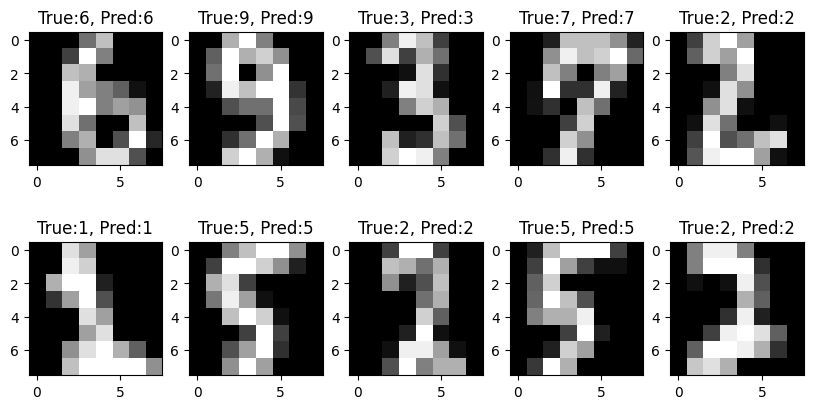

In [ ]:
# Load requied packages
import torch
import torchvision
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the data
digits = datasets.load_digits()
data = digits.images
labels = digits.target

# Preprocess the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 64)).reshape(-1, 8, 8)

# Split the data into train and test datasets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
train_data = torch.tensor(train_data, dtype=torch.float32).unsqueeze(1)
test_data = torch.tensor(test_data, dtype=torch.float32).unsqueeze(1)
train_labels = torch.tensor(train_labels, dtype=torch.long)
test_labels = torch.tensor(test_labels, dtype=torch.long)

# Define the CNN
model = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),
    torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2, stride=2),
    torch.nn.Flatten(),
    torch.nn.Linear(64*2*2, 10),
)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define the loss function and the optimizer
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Train the model
losses = []
epochs = 200
for epoch in range(epochs):
    inputs = train_data.to(device)
    labels = train_labels.to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    # Record the loss
    losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

# Test the model
model.eval()
test_data = test_data.to(device)
test_labels = test_labels.to(device)
outputs = model(test_data)
_, predicted = torch.max(outputs.data, 1)
correct = (predicted == test_labels).sum().item()
print('Accuracy: {:.2f} %'.format(correct / len(test_labels) * 100))

# Plot the loss during training
plt.figure(figsize=(9,5))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Plot the results
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax = axs[i//5, i%5]
    ax.imshow(test_data[i, 0].cpu().numpy(), cmap='gray')
    ax.set_title(f"True:{test_labels[i]}, Pred:{predicted[i]}")
plt.show()
